In [6]:
import numpy as np
import pyflux as pf



In [7]:
import pandas as pd
from pandas_datareader import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
data = pd.read_excel('data.xlsx')
data = data.fillna(0)
data = data.set_index('Date')
data


,NVS,PFIZER,SANOFI,Merck,JOHNSON,BAYER,EUROFINS,GUERBET,SARTORIUS,VETOQUINOL,LNA,BASTIDE,CELYAD,Nanobiotix,AB,RAMSAY,INNATE,BONE
Date,,,,,,,,,,,,,,,,,,
2010-11-01,-0.007420,0.011481,-0.002563,-0.001652,-0.000784,0.000933,-0.004494,0.017532,0.000606,0.014445,0.010989,0.001078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-11-02,0.013213,-0.009648,0.015991,0.009931,0.002983,0.017710,-0.018059,-0.017230,0.001213,-0.020712,-0.001359,0.024758,0.000000,0.000000,0.003141,0.018836,0.006623,0.000000
2010-11-03,0.005834,0.008023,-0.003092,-0.002732,0.004853,0.008766,-0.000230,-0.021818,-0.001211,-0.003635,-0.004762,-0.002101,0.000000,0.000000,-0.003132,-0.019816,0.000000,0.000000
2010-11-04,0.007335,-0.011939,0.023682,0.003835,0.008880,0.025032,0.011957,0.000531,0.003031,-0.001658,-0.004785,0.005263,0.000000,0.000000,-0.001047,0.007640,0.026316,0.000000
2010-11-05,-0.007113,-0.011507,-0.011842,-0.025921,-0.001699,-0.009237,0.007271,-0.002256,0.000906,0.013289,0.013049,-0.004188,0.000000,0.000000,-0.015723,-0.001336,-0.006410,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-22,0.004737,-0.000823,-0.013496,-0.038097,0.009217,-0.017496,0.007601,0.000000,-0.022455,0.000000,0.011555,0.000000,-0.078916,0.013699,-0.012658,0.000000,-0.024540,-0.023290
2019-10-23,-0.003909,0.009333,0.009929,0.019311,0.005418,0.030607,0.007544,0.015119,-0.022205,0.000000,-0.019730,-0.007692,0.030691,-0.022258,-0.005128,0.005714,-0.020665,0.013413
2019-10-24,0.007041,-0.010335,0.013328,-0.003499,-0.018476,0.006479,0.019186,0.005319,0.018794,0.000000,-0.009534,0.002584,0.012407,-0.015447,-0.007732,-0.022727,0.003670,0.010294


In [12]:
data = pf.GARCH.transformer(data)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-11-01,0.017532,-0.007420,0.018870,0.007734,0.057649,0.033629
2010-11-02,0.024758,-0.020712,0.018929,0.007793,0.058618,0.034194
2010-11-03,0.008766,-0.021818,0.013952,0.002816,-0.023503,-0.013710
2010-11-04,0.026316,-0.011939,0.022279,0.011144,0.113905,0.066444
2010-11-05,0.013289,-0.025921,0.012590,0.001454,-0.045979,-0.026821
...,...,...,...,...,...,...
2019-10-22,0.013699,-0.078916,0.003848,-0.007288,-0.190216,-0.110959
2019-10-23,0.030691,-0.022258,0.019053,0.007917,0.060671,0.035391
2019-10-24,0.019186,-0.022727,0.016747,0.005612,0.022628,0.013199


Text(0.5, 1.0, 'market stock Returns')

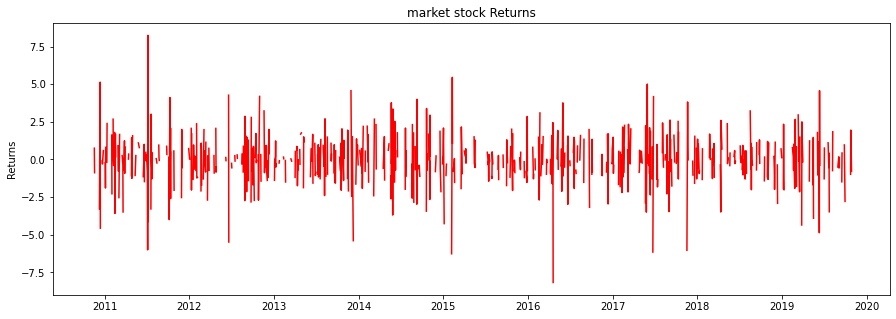

In [14]:
jpm = data
returns = pd.DataFrame(np.diff(np.log(jpm['Adj Close'].values)))
returns.index = jpm.index.values[1:jpm.index.values.shape[0]]
returns.columns = ['JPM Returns']

plt.figure(figsize=(15,5));
plt.plot(returns.index,returns, color='r')
plt.ylabel('Returns')
plt.title('markReturns')

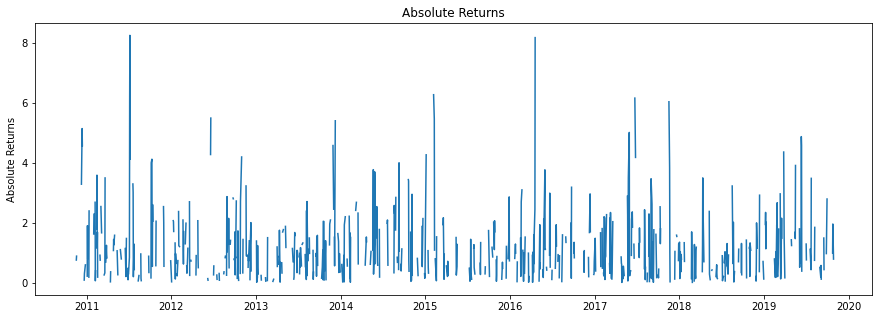

In [15]:
plt.figure(figsize=(15,5))
plt.plot(returns.index, np.abs(returns))
plt.ylabel('Absolute Returns')
plt.title('Absolute Returns');

In [16]:
model = pf.GARCH(returns, p=1, q=1)
x = model.fit()
x.summary()

GARCH(1,1)                                                                                                
======================================================= ==================================================
Dependent Variable: JPM Returns                         Method: MLE                                       
Start Date: 2010-11-03 00:00:00                         Log Likelihood: nan                               
End Date: 2019-10-28 00:00:00                           AIC: nan                                          
Number of observations: 2236                            BIC: nan                                          
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             0.0009                                                           
q(1)                                 